In [11]:
!pip install numpy scikit-learn tsplib95 python_tsp k-means-constrained

Defaulting to user installation because normal site-packages is not writeable


In [12]:
import numpy as np
from algo.get_clusters import get_clusters
from algo.concatenate_all import concatenate_all
from python_tsp.distances.euclidean_distance import euclidean_distance_matrix
from python_tsp.heuristics.local_search import solve_tsp_local_search

def solve_cluster_tsp(nodes, n_clusters = 8, MIN_SIZE = 50):

    if len(nodes) <= n_clusters * 4:
        distance_matrix = euclidean_distance_matrix(nodes)
        permutation, _ = solve_tsp_local_search(distance_matrix)
        final_cluster = np.atleast_2d([nodes[x] for x in permutation])
        print(f"Final cluster size: {len(final_cluster)}")
        return final_cluster, np.mean(nodes, axis=0)


    clusters, centroids = get_clusters(nodes, n_clusters)
    solved_clusters = []
    for cluster in clusters:
        solved_clusters.append(solve_cluster_tsp(cluster, n_clusters - 1, MIN_SIZE)[0])

    return concatenate_all(solved_clusters, centroids)

In [13]:
from misc.get_dataset import get_dataset

path = "data/pbl395.tsp"
nodes = get_dataset(path)

result, _ = solve_cluster_tsp(nodes)
print(result)

Final cluster size: 5
Final cluster size: 8
Final cluster size: 4
Final cluster size: 10
Final cluster size: 4
Final cluster size: 6
Final cluster size: 6
Final cluster size: 10
Final cluster size: 8
Final cluster size: 5
Final cluster size: 7
Final cluster size: 7
Final cluster size: 13
Final cluster size: 4
Final cluster size: 4
Final cluster size: 8
Final cluster size: 5
Final cluster size: 5
Final cluster size: 4
Final cluster size: 6
Final cluster size: 6
Final cluster size: 7
Final cluster size: 8
Final cluster size: 10
Final cluster size: 8
Final cluster size: 9
Final cluster size: 7
Final cluster size: 5
Final cluster size: 11
Final cluster size: 7
Final cluster size: 7
Final cluster size: 9
Final cluster size: 6
Final cluster size: 9
Final cluster size: 18
[]
Final cluster size: 4
Final cluster size: 10
Final cluster size: 10
Final cluster size: 8
Final cluster size: 11
Final cluster size: 9
Final cluster size: 9
Final cluster size: 9
Final cluster size: 5
Final cluster size: 

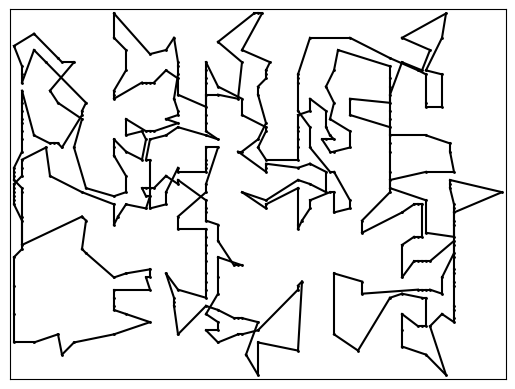

In [14]:
from plotting.plot_path import plot_path

plot_path(result)

In [15]:
from misc.print_error import print_error

print_error(result, path)

1761.6982974231814
Final error: 37.525%
